In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Load actual data (wind direction and wind speed) from station (dir -1 means variable direcction)**

In [5]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time","dir_o","spd_o"],
                          parse_dates=["time"]).set_index("time")
station.describe()

,dir_o,spd_o
count,41350.000000,41349.000000
mean,160.983990,3.062677
std,115.183827,1.903281
min,-1.000000,0.000000
25%,20.000000,1.543332
50%,200.000000,2.572220
75%,240.000000,4.115552
max,360.000000,16.976652


**Climatology labeled and relationship variable wind (VRB) and wind intensity**

In [6]:
#wind direction to interval dir=-1 variable wind
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])

labels = ['VRB', '[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]',
          '(100, 120]', '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]',
          '(200, 220]','(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]',
          '(300, 320]', '(320, 340]', '(340, 360]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)


#observed climatology
print("wind direction climatology\n")
print(station["dir_l"].value_counts(normalize= True).transform(lambda x: '{:,.0%}'.format(x)))

station["spd_o_kt"]=np.rint(station["spd_o"]*1.94384)
print("\nwind intensity percentage (kt) when wind variable\n")
print(station[station.dir_l=="VRB"]["spd_o_kt"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x)))
print("\nwind direction when wind speed equal or less than 3 kt\n")
station[station.spd_o_kt<=3]["dir_l"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x))


wind direction climatology

VRB           18%
(180, 200]    15%
(200, 220]    10%
(220, 240]     8%
[0, 20]        8%
(260, 280]     8%
(240, 260]     7%
(160, 180]     7%
(20, 40]       4%
(340, 360]     4%
(280, 300]     3%
(40, 60]       2%
(300, 320]     2%
(320, 340]     2%
(60, 80]       1%
(80, 100]      1%
(140, 160]     0%
(100, 120]     0%
(120, 140]     0%
Name: dir_l, dtype: object

wind intensity percentage (kt) when wind variable

2.0     47%
1.0     25%
3.0     12%
4.0      7%
5.0      4%
6.0      2%
7.0      1%
8.0      1%
9.0      1%
10.0     0%
11.0     0%
12.0     0%
13.0     0%
14.0     0%
15.0     0%
Name: spd_o_kt, dtype: object

wind direction when wind speed equal or less than 3 kt



VRB           53%
[0, 20]       12%
(220, 240]     5%
(200, 220]     4%
(180, 200]     3%
(20, 40]       3%
(240, 260]     3%
(340, 360]     3%
(260, 280]     2%
(320, 340]     2%
(280, 300]     2%
(40, 60]       2%
(160, 180]     2%
(300, 320]     2%
(60, 80]       1%
(80, 100]      1%
(140, 160]     0%
(100, 120]     0%
(120, 140]     0%
Name: dir_l, dtype: object

**Forecast D1**

In [7]:
#forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,8.171858,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,8.045405,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,7.194441,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,7.239085,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,6.878137,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,28.299652,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,27.654913,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,30.302912,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


**Delete rows with wind direction variable obseved**

In [8]:
#concat station vs meteorological  model. Delete variable (VRB) observed direction
df_vrb = pd.concat([station,model1k],axis=1).drop(columns=["spd_o","spd_o_kt"]).dropna()
df_all1k = df_vrb[df_vrb.dir_o!=-1]
df_all1k

,dir_o,dir_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,280.0,"(260, 280]",325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,...,0.0,0.000000e+00,0.142531,0.0,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 02:00:00,0.0,"[0, 20]",351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,...,0.0,-8.593750e-07,0.061034,0.0,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,0.0,"[0, 20]",33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,...,0.0,0.000000e+00,0.065096,0.0,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,240.0,"(220, 240]",164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,...,0.0,-2.343750e-09,0.085678,0.0,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
2019-01-02 05:00:00,220.0,"(200, 220]",172.277390,0.0,1675.816650,0.444178,0.813525,103278.773438,279.637054,0.811063,...,0.0,6.640625e-06,0.108834,0.0,0.0,0.108834,5723.016113,1601.333618,253.504395,281.562134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 18:00:00,50.0,"(40, 60]",12.080528,0.0,1088.941895,4.722949,8.407689,102725.757812,281.265991,0.878828,...,0.0,4.375000e-04,0.000000,0.0,0.0,0.000000,5522.567871,1527.255859,247.232056,273.602631
2020-12-24 19:00:00,40.0,"(20, 40]",15.196351,0.0,1130.906982,4.987753,11.324133,102787.117188,280.919373,0.870596,...,0.0,6.250000e-05,0.000000,0.0,0.0,0.000000,5537.417480,1531.997803,247.842743,273.755432
2020-12-24 21:00:00,60.0,"(40, 60]",14.447461,0.0,1130.548462,5.296582,11.482006,102860.429688,280.298004,0.850470,...,0.0,1.171875e-03,0.000000,0.0,0.0,0.000000,5539.025391,1538.744385,248.260315,273.823364


**Label meteorological points 0 and 1**

In [9]:
#label meteorological model variables dir0 and dir1
df_all1k["dir0_l"] = pd.cut(df_all1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all1k["dir1_l"] = pd.cut(df_all1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all1k[["dir_l","dir0_l","dir1_l"]].sample(20)

<ipython-input-9-28af0ba5eb09>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-28af0ba5eb09>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dir_l,dir0_l,dir1_l
time,,,
2019-09-11 23:00:00,"(280, 300]","(100, 120]","(80, 100]"
2019-08-31 04:00:00,"[0, 20]","(340, 360]","[0, 20]"
2019-04-17 19:00:00,"(160, 180]","(160, 180]","(160, 180]"
2019-06-18 02:00:00,"(220, 240]","(140, 160]","(160, 180]"
2019-05-11 22:00:00,"(340, 360]","(20, 40]","(20, 40]"
2019-05-20 04:00:00,"[0, 20]","(140, 160]","(160, 180]"
2019-07-21 06:00:00,"[0, 20]","(340, 360]","[0, 20]"
2020-04-19 18:00:00,"(260, 280]","(280, 300]","(280, 300]"
2020-10-17 10:00:00,"(160, 180]","(140, 160]","(140, 160]"


**meteorological model score point 0**

****

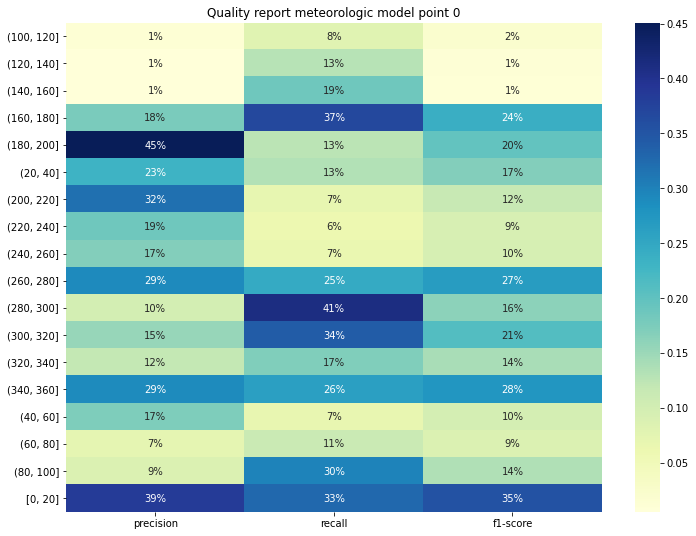

In [10]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

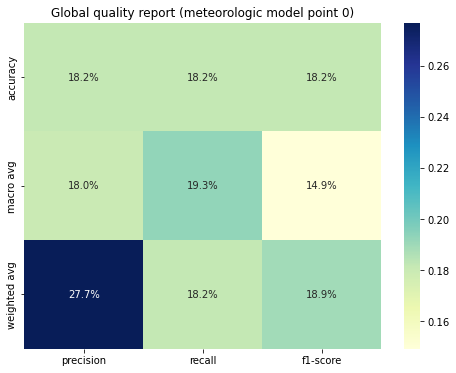

In [11]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

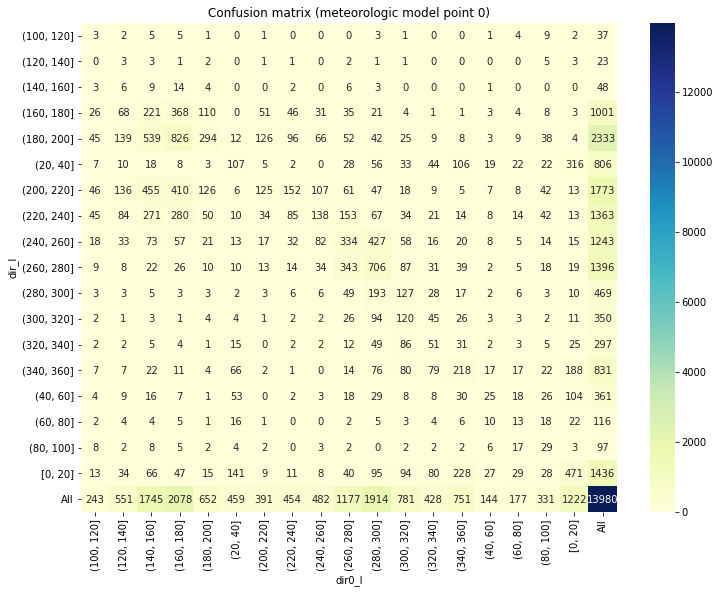

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

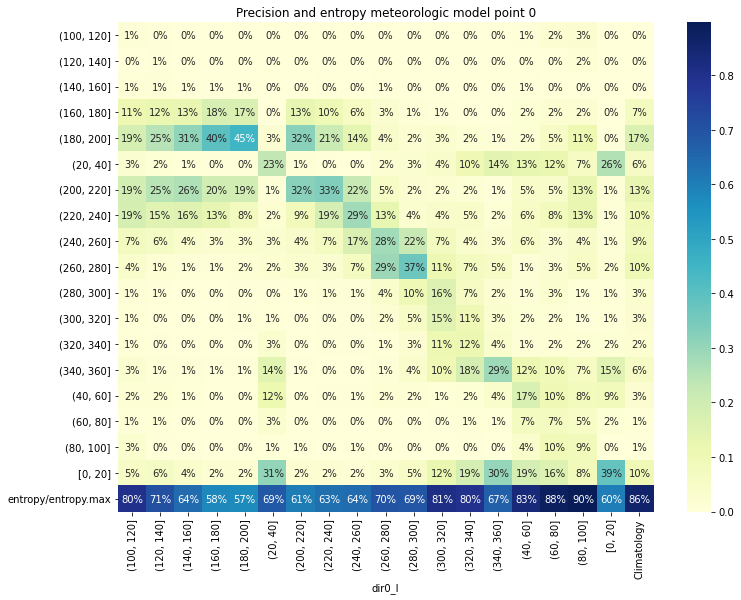

In [13]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 1**

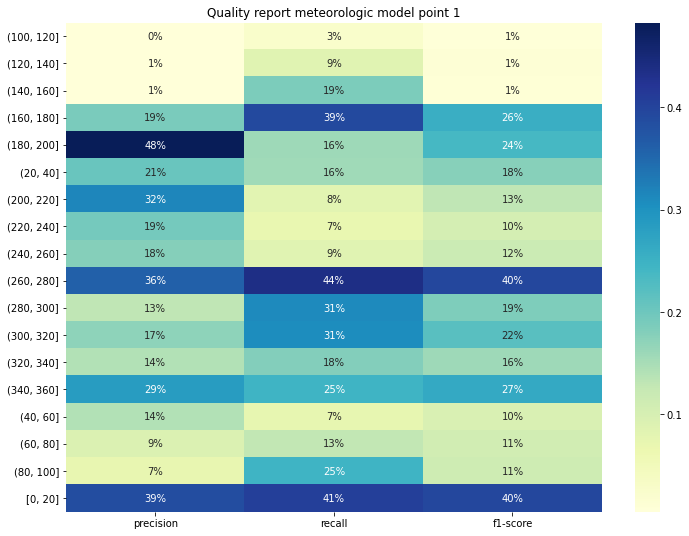

In [14]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 1")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir1_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

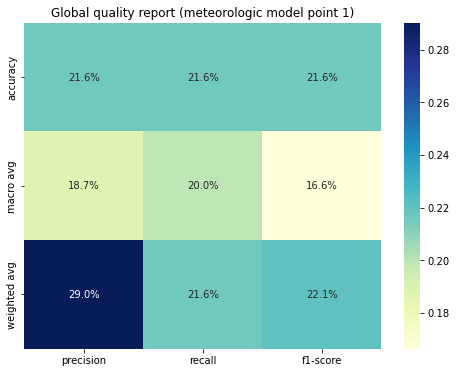

In [15]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 1)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

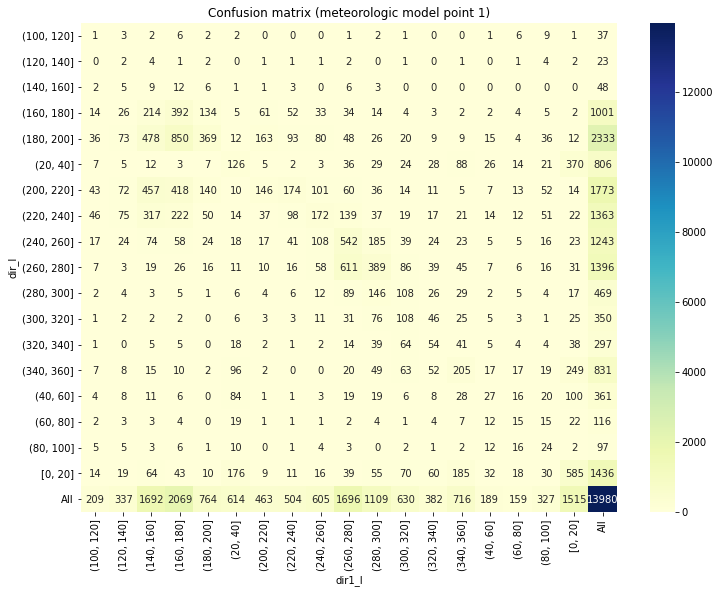

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 1)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

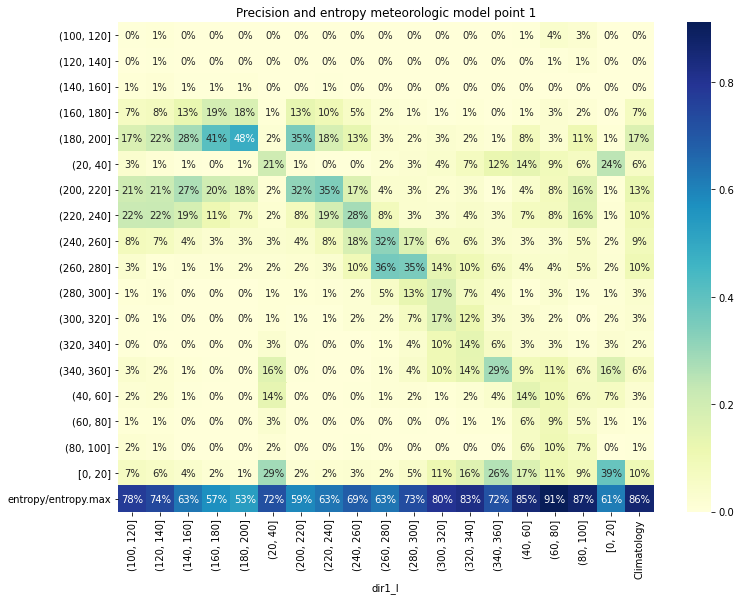

In [17]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 1")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**T test accuracy (2 samples) at point 0 and point 1. Best point 1. Significance level (alpha) = 0.01.
Test two sides and one side**

In [18]:
from sklearn.metrics import accuracy_score
import scipy.stats as stats

#Accuracy in 20 samples
concat = df_all1k[["dir_l","dir0_l","dir1_l"]]
acc_met0 = []
acc_met1 = []

for t in range (0,20):
  #sample lenght as y_test machine learning
  concat_t = concat.sample(2472)
  acc_met0.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir0_l"]),2))
  acc_met1.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir1_l"]),2))

print(pd.DataFrame(acc_met0,columns=["Accuracy point 0"]).describe()) 
print("\nAccuracy list point 0:") 
acc0 = np.around(acc_met0, decimals=2)
print(acc0)
print("****************")
print(pd.DataFrame(acc_met1,columns=["Accuracy point 1"]).describe()) 
print("\nAccuracy list point 1:") 
acc1 = np.around(acc_met1, decimals=2)
print(acc1)

#two samples t test two sides
alpha = 0.01
_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False)

print("\nt test two samples two sides")
print("\np_value:",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis  accuracy mean point0 not equal accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")

#two samples t test one side
#alternative hypothesis the mean of the distribution underlying the first sample is less than 
#the mean of the distribution underlying the second sample.

_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False,alternative="less")

print("\nt test two samples one side")
print("\np_value:",p_value)
alpha = 0.01
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean point0 is less than accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")



       Accuracy point 0
count         20.000000
mean           0.183500
std            0.008751
min            0.170000
25%            0.180000
50%            0.180000
75%            0.190000
max            0.210000

Accuracy list point 0:
[0.18 0.19 0.18 0.18 0.18 0.21 0.18 0.17 0.19 0.19 0.19 0.18 0.18 0.18
 0.17 0.19 0.18 0.19 0.18 0.18]
****************
       Accuracy point 1
count         20.000000
mean           0.216500
std            0.009881
min            0.200000
25%            0.210000
50%            0.220000
75%            0.220000
max            0.230000

Accuracy list point 1:
[0.22 0.22 0.21 0.22 0.21 0.23 0.21 0.2  0.22 0.23 0.22 0.22 0.23 0.21
 0.2  0.22 0.2  0.22 0.23 0.21]

t test two samples two sides

p_value: 1.7044971262085218e-13

we are rejecting null hypothesis  H0 accuracy mean point0= accuracy mean point 1

we are accepting alternative hypothesis  accuracy mean point0 not equal accuracy mean point 1

t test two samples one side

p_value: 8.522485631042609e

**T test compare accuracy means forecast day o and day 1. Independent samples. Points 0 and 1**

In [34]:
#accuracy point 0 forecast d0
acc0_d0 = [0.19, 0.18, 0.17, 0.18, 0.2, 0.19, 0.19, 0.18, 0.2, 0.19, 0.2, 0.19,
            0.2, 0.19, 0.2, 0.2, 0.19, 0.18, 0.2, 0.19]

#accuracy point 1 forecast d0
acc1_d0 = [0.22, 0.22, 0.2, 0.22, 0.23, 0.23, 0.23, 0.21, 0.23, 0.22, 0.24, 0.22,
           0.24, 0.23, 0.23, 0.24, 0.22, 0.22, 0.23, 0.21]

#point 0
#two samples t test two sides
print("point 0")
alpha = 0.01
_,p_value=stats.ttest_ind(acc0,acc0_d0,equal_var= False)

print("\nt test two independent samples two sides")
print("\np_value:",p_value)
print("\nalpha:",alpha)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1")
    print("\nwe are accepting alternative hypothesis  accuracy mean forecast d0 not equal accuracy mean forecast 1")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1") 

#two independent samples one side

#alternative hypothesis the mean of the distribution underlying the first sample is less than 
#the mean of the distribution underlying the second sample.

_,p_value=stats.ttest_ind(acc0,acc0_d0,equal_var= False, alternative="less")

print("\nt test two independent samples two sides")
print("\np_value:",p_value)
print("\nalpha:",alpha)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1")
    print("\nwe are accepting alternative hypothesis accuracy mean forecast d1 is less accuracy mean forecast d0")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1") 

#point 1
#two samples t test two sides
print("\npoint 1")
alpha = 0.01
_,p_value=stats.ttest_ind(acc1,acc1_d0,equal_var= False)

print("\nt test two independent samples two sides")
print("\np_value:",p_value)
print("\nalpha:",alpha)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1")
    print("\nwe are accepting alternative hypothesis  accuracy mean forecast d0 not equal accuracy mean forecast 1")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1") 

#two independent samples one side

#alternative hypothesis the mean of the distribution underlying the first sample is less than 
#the mean of the distribution underlying the second sample.

_,p_value=stats.ttest_ind(acc1,acc1_d0,equal_var= False, alternative="less")

print("\nt test two independent samples two sides")
print("\np_value:",p_value)
print("\nalpha:",alpha)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1")
    print("\nwe are accepting alternative hypothesis  accuracy mean forecast d1 is less accuracy mean forecast d0")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1") 


point 0

t test two independent samples two sides

p_value: 0.016358811106658204

alpha: 0.01

we are accepting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1

t test two independent samples two sides

p_value: 0.008179405553329102

alpha: 0.01

we are rejecting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1

we are accepting alternative hypothesis accuracy mean forecast d1 is less accuracy mean forecast d0

point 1

t test two independent samples two sides

p_value: 0.017647034399517293

alpha: 0.01

we are accepting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1

t test two independent samples two sides

p_value: 0.008823517199758647

alpha: 0.01

we are rejecting null hypothesis  H0 accuracy mean forecast d0 = accuracy mean forecast d1

we are accepting alternative hypothesis  accuracy mean forecast d1 is less accuracy mean forecast d0


**Test association between observed variable and meteorological model (point 0) (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [19]:
#two way table
pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l)

dir0_l,"(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]","(20, 40]","(200, 220]","(220, 240]","(240, 260]","(260, 280]","(280, 300]","(300, 320]","(320, 340]","(340, 360]","(40, 60]","(60, 80]","(80, 100]","[0, 20]"
dir_l,,,,,,,,,,,,,,,,,,
"(100, 120]",3,2,5,5,1,0,1,0,0,0,3,1,0,0,1,4,9,2
"(120, 140]",0,3,3,1,2,0,1,1,0,2,1,1,0,0,0,0,5,3
"(140, 160]",3,6,9,14,4,0,0,2,0,6,3,0,0,0,1,0,0,0
"(160, 180]",26,68,221,368,110,0,51,46,31,35,21,4,1,1,3,4,8,3
"(180, 200]",45,139,539,826,294,12,126,96,66,52,42,25,9,8,3,9,38,4
"(20, 40]",7,10,18,8,3,107,5,2,0,28,56,33,44,106,19,22,22,316
"(200, 220]",46,136,455,410,126,6,125,152,107,61,47,18,9,5,7,8,42,13
"(220, 240]",45,84,271,280,50,10,34,85,138,153,67,34,21,14,8,14,42,13
"(240, 260]",18,33,73,57,21,13,17,32,82,334,427,58,16,20,8,5,14,15


**All cells must be more than five!!!. No Chi square test posible**

In [35]:
from scipy.stats import chi2_contingency

alpha = 0.01

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l))

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables

print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model variables and observed values")
else:
    print("Retain H0,There is no association between meteorological model variables and observed values")

p-value: 0.0
Significance level: 0.01
Degres of of freedom:  289
Stadistic 17756.413266448202
Reject H0,There is an association between meteorological model variables and observed values


In [36]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

**Machine learning**

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [07:39<00:00, 15.86s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.40,0.28,None,0.39,4.21
RandomForestClassifier,0.41,0.27,None,0.40,9.57
LGBMClassifier,0.40,0.25,None,0.38,26.87
LabelSpreading,0.32,0.24,None,0.32,21.79
LabelPropagation,0.32,0.24,None,0.32,11.66
BaggingClassifier,0.36,0.24,None,0.35,5.94
KNeighborsClassifier,0.32,0.23,None,0.32,1.63
XGBClassifier,0.38,0.23,None,0.36,63.51
DecisionTreeClassifier,0.30,0.21,None,0.30,1.06


**Compare Machine learning accuracy vs meteorological model accuracy point 0 and 1.**


Confusion matrix  (Machine Learning)


Quality report (Machine Learning)



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     1.000000
(140, 160]     0.000000  0.000000  0.000000    10.000000
(160, 180]     0.475610  0.265306  0.340611   147.000000
(180, 200]     0.456057  0.558140  0.501961   344.000000
(20, 40]       0.409091  0.207692  0.275510   130.000000
(200, 220]     0.419847  0.443548  0.431373   248.000000
(220, 240]     0.382979  0.369231  0.375979   195.000000
(240, 260]     0.333333  0.219780  0.264901   182.000000
(260, 280]     0.393443  0.457143  0.422907   210.000000
(280, 300]     0.357143  0.149254  0.210526    67.000000
(300, 320]     0.208333  0.125000  0.156250    40.000000
(320, 340]     0.500000  0.127660  0.203390    47.000000
(340, 360]     0.354430  0.231405  0.280000   121.000000
(40, 60]       0.227273  0.087719  0.126582    57.000000
(60, 80]       0.500000  0.038462  0.071429    26.000000
(80, 100]      0.375000  0.1875

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     9.000000
(120, 140]     0.000000  0.000000  0.000000     2.000000
(140, 160]     0.000000  0.000000  0.000000    15.000000
(160, 180]     0.444444  0.188235  0.264463   170.000000
(180, 200]     0.431670  0.594030  0.500000   335.000000
(20, 40]       0.453125  0.204225  0.281553   142.000000
(200, 220]     0.456897  0.395522  0.424000   268.000000
(220, 240]     0.404494  0.387097  0.395604   186.000000
(240, 260]     0.335938  0.225131  0.269592   191.000000
(260, 280]     0.438596  0.476190  0.456621   210.000000
(280, 300]     0.206897  0.100000  0.134831    60.000000
(300, 320]     0.478261  0.183333  0.265060    60.000000
(320, 340]     0.428571  0.133333  0.203390    45.000000
(340, 360]     0.386364  0.285714  0.328502   119.000000
(40, 60]       0.350000  0.114754  0.172840    61.000000
(60, 80]       0.333333  0.066667  0.111111    15.000000
(80, 100]      0.750000  0.2142

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     6.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.500000  0.100000  0.166667    10.000000
(160, 180]     0.459459  0.232877  0.309091   146.000000
(180, 200]     0.474273  0.629080  0.540816   337.000000
(20, 40]       0.328358  0.166667  0.221106   132.000000
(200, 220]     0.426230  0.367491  0.394687   283.000000
(220, 240]     0.385475  0.355670  0.369973   194.000000
(240, 260]     0.330769  0.212871  0.259036   202.000000
(260, 280]     0.430622  0.424528  0.427553   212.000000
(280, 300]     0.225806  0.107692  0.145833    65.000000
(300, 320]     0.315789  0.120000  0.173913    50.000000
(320, 340]     0.583333  0.127273  0.208955    55.000000
(340, 360]     0.432836  0.258929  0.324022   112.000000
(40, 60]       0.240000  0.130435  0.169014    46.000000
(60, 80]       0.000000  0.000000  0.000000    17.000000
(80, 100]      0.600000  0.2000

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     2.000000
(140, 160]     0.000000  0.000000  0.000000     6.000000
(160, 180]     0.413333  0.201299  0.270742   154.000000
(180, 200]     0.441441  0.574780  0.499363   341.000000
(20, 40]       0.333333  0.220183  0.265193   109.000000
(200, 220]     0.417004  0.396154  0.406312   260.000000
(220, 240]     0.418182  0.334951  0.371968   206.000000
(240, 260]     0.282609  0.240741  0.260000   162.000000
(260, 280]     0.444444  0.442308  0.443373   208.000000
(280, 300]     0.387097  0.151899  0.218182    79.000000
(300, 320]     0.461538  0.214286  0.292683    56.000000
(320, 340]     0.692308  0.166667  0.268657    54.000000
(340, 360]     0.406977  0.299145  0.344828   117.000000
(40, 60]       0.120000  0.069767  0.088235    43.000000
(60, 80]       0.000000  0.000000  0.000000    28.000000
(80, 100]      0.500000  0.1666

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score     support
(100, 120]     0.000000  0.000000  0.000000     4.00000
(120, 140]     0.000000  0.000000  0.000000     3.00000
(140, 160]     0.000000  0.000000  0.000000     5.00000
(160, 180]     0.476190  0.246914  0.325203   162.00000
(180, 200]     0.492473  0.585678  0.535047   391.00000
(20, 40]       0.377778  0.278689  0.320755   122.00000
(200, 220]     0.442623  0.435484  0.439024   248.00000
(220, 240]     0.401274  0.328125  0.361032   192.00000
(240, 260]     0.283019  0.163934  0.207612   183.00000
(260, 280]     0.380952  0.441989  0.409207   181.00000
(280, 300]     0.189189  0.118644  0.145833    59.00000
(300, 320]     0.272727  0.105263  0.151899    57.00000
(320, 340]     0.250000  0.042553  0.072727    47.00000
(340, 360]     0.463415  0.299213  0.363636   127.00000
(40, 60]       0.222222  0.060606  0.095238    66.00000
(60, 80]       0.000000  0.000000  0.000000    20.00000
(80, 100]      0.500000  0.071429  0.125000    1

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000     2.000000
(160, 180]     0.454545  0.265152  0.334928   132.000000
(180, 200]     0.450575  0.597561  0.513761   328.000000
(20, 40]       0.333333  0.212389  0.259459   113.000000
(200, 220]     0.406926  0.346863  0.374502   271.000000
(220, 240]     0.422078  0.291480  0.344828   223.000000
(240, 260]     0.348837  0.248619  0.290323   181.000000
(260, 280]     0.442688  0.489083  0.464730   229.000000
(280, 300]     0.222222  0.111111  0.148148    72.000000
(300, 320]     0.230769  0.130435  0.166667    46.000000
(320, 340]     0.230769  0.069767  0.107143    43.000000
(340, 360]     0.418367  0.317829  0.361233   129.000000
(40, 60]       0.166667  0.038462  0.062500    52.000000
(60, 80]       0.000000  0.000000  0.000000    19.000000
(80, 100]      1.000000  0.0909

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     8.000000
(140, 160]     0.000000  0.000000  0.000000     5.000000
(160, 180]     0.458824  0.263514  0.334764   148.000000
(180, 200]     0.482684  0.619444  0.542579   360.000000
(20, 40]       0.347222  0.213675  0.264550   117.000000
(200, 220]     0.412879  0.406716  0.409774   268.000000
(220, 240]     0.394286  0.377049  0.385475   183.000000
(240, 260]     0.333333  0.224044  0.267974   183.000000
(260, 280]     0.416290  0.438095  0.426914   210.000000
(280, 300]     0.186047  0.119403  0.145455    67.000000
(300, 320]     0.400000  0.126984  0.192771    63.000000
(320, 340]     0.384615  0.111111  0.172414    45.000000
(340, 360]     0.362745  0.318966  0.339450   116.000000
(40, 60]       0.210526  0.080000  0.115942    50.000000
(60, 80]       0.000000  0.000000  0.000000    13.000000
(80, 100]      0.666667  0.090909  0.160000    22.000000
VRB            0.357049  0.5634

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score  support
(100, 120]     0.000000  0.000000  0.000000      6.0
(120, 140]     0.000000  0.000000  0.000000      2.0
(140, 160]     0.000000  0.000000  0.000000      7.0
(160, 180]     0.437500  0.256098  0.323077    164.0
(180, 200]     0.468966  0.584527  0.520408    349.0
(20, 40]       0.456140  0.211382  0.288889    123.0
(200, 220]     0.428030  0.426415  0.427221    265.0
(220, 240]     0.454023  0.362385  0.403061    218.0
(240, 260]     0.366412  0.262295  0.305732    183.0
(260, 280]     0.436441  0.497585  0.465011    207.0
(280, 300]     0.478261  0.169231  0.250000     65.0
(300, 320]     0.384615  0.208333  0.270270     48.0
(320, 340]     0.357143  0.135135  0.196078     37.0
(340, 360]     0.433735  0.285714  0.344498    126.0
(40, 60]       0.217391  0.096154  0.133333     52.0
(60, 80]       0.000000  0.000000  0.000000     19.0
(80, 100]      0.400000  0.250000  0.307692     16.0
VRB            0.342535  0.569937  0.427900   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     5.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000     5.000000
(160, 180]     0.440476  0.256944  0.324561   144.000000
(180, 200]     0.471698  0.578035  0.519481   346.000000
(20, 40]       0.343284  0.196581  0.250000   117.000000
(200, 220]     0.368644  0.342520  0.355102   254.000000
(220, 240]     0.494681  0.428571  0.459259   217.000000
(240, 260]     0.374194  0.318681  0.344214   182.000000
(260, 280]     0.441558  0.463636  0.452328   220.000000
(280, 300]     0.212121  0.106061  0.141414    66.000000
(300, 320]     0.315789  0.120000  0.173913    50.000000
(320, 340]     0.125000  0.023810  0.040000    42.000000
(340, 360]     0.321839  0.237288  0.273171   118.000000
(40, 60]       0.263158  0.090909  0.135135    55.000000
(60, 80]       0.500000  0.111111  0.181818    18.000000
(80, 100]      1.000000  0.1904

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     7.000000
(120, 140]     0.000000  0.000000  0.000000     4.000000
(140, 160]     0.000000  0.000000  0.000000     6.000000
(160, 180]     0.373494  0.196203  0.257261   158.000000
(180, 200]     0.456019  0.586310  0.513021   336.000000
(20, 40]       0.276316  0.181034  0.218750   116.000000
(200, 220]     0.412245  0.378277  0.394531   267.000000
(220, 240]     0.408377  0.371429  0.389027   210.000000
(240, 260]     0.365079  0.227723  0.280488   202.000000
(260, 280]     0.323529  0.423077  0.366667   182.000000
(280, 300]     0.391304  0.125000  0.189474    72.000000
(300, 320]     0.208333  0.108696  0.142857    46.000000
(320, 340]     0.272727  0.066667  0.107143    45.000000
(340, 360]     0.385542  0.290909  0.331606   110.000000
(40, 60]       0.266667  0.137931  0.181818    58.000000
(60, 80]       0.666667  0.160000  0.258065    25.000000
(80, 100]      0.600000  0.2727

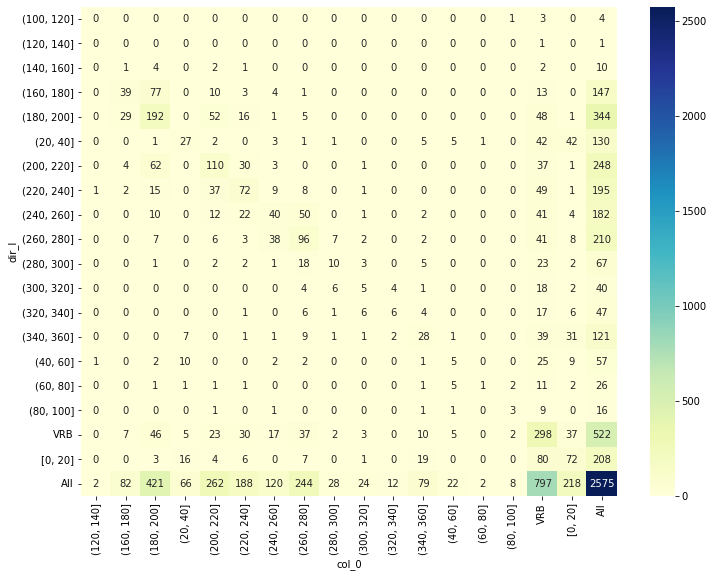

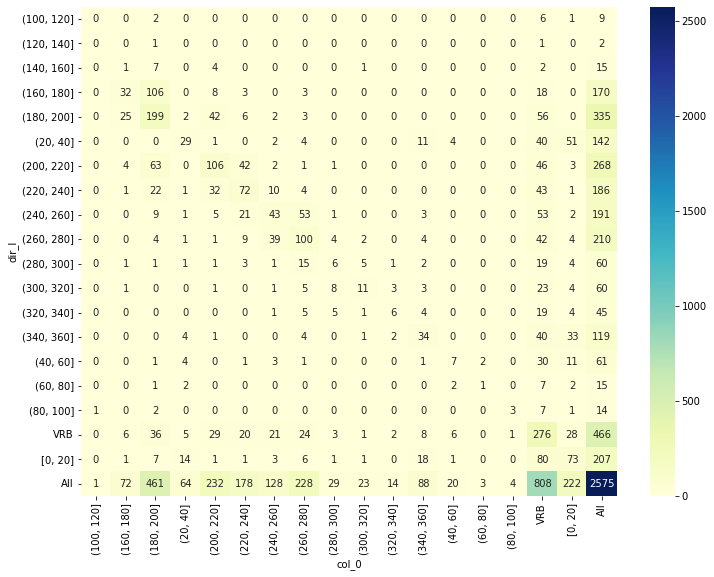

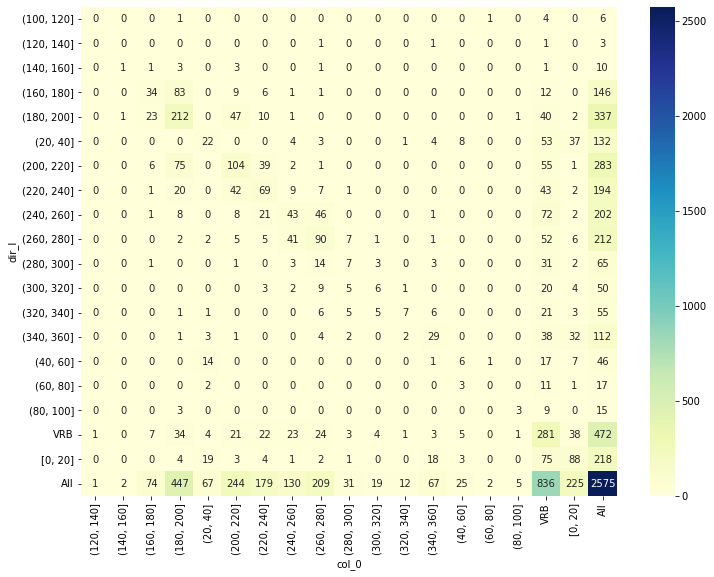

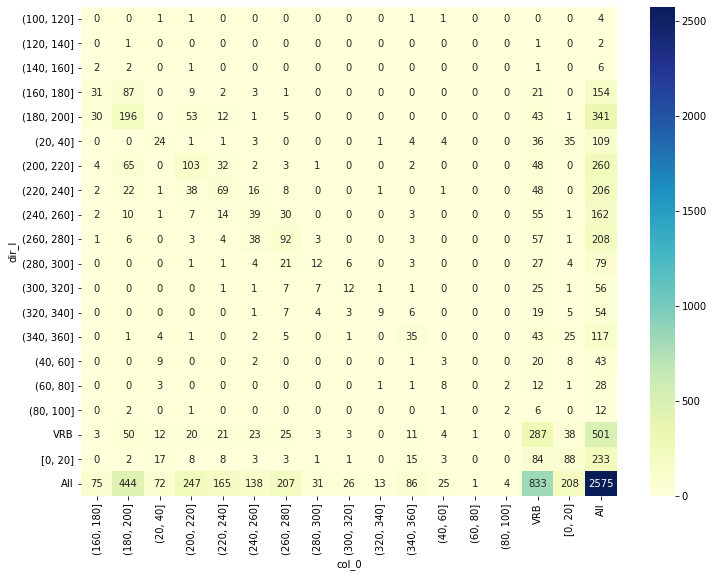

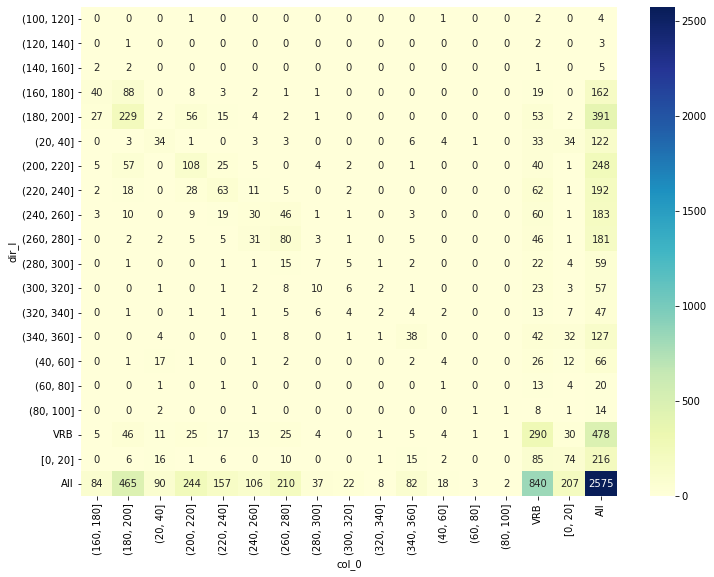

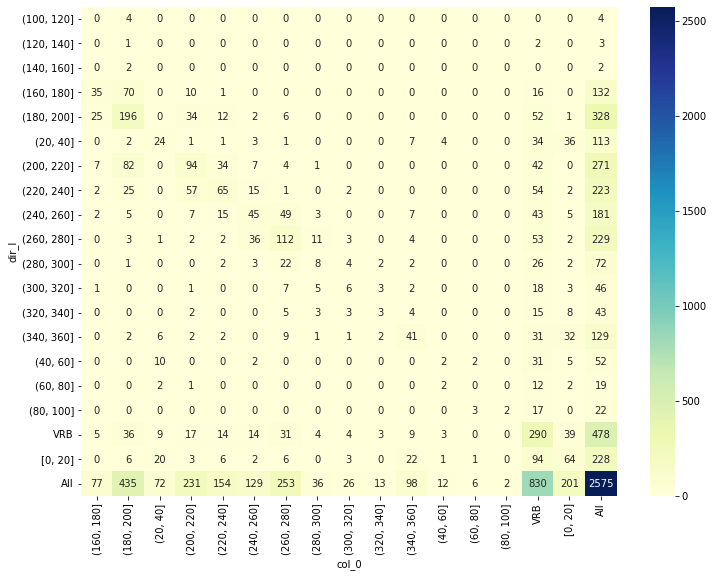

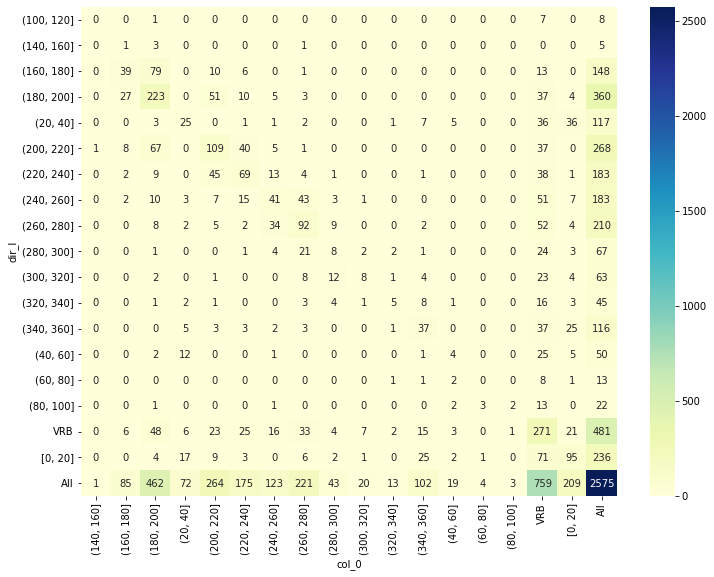

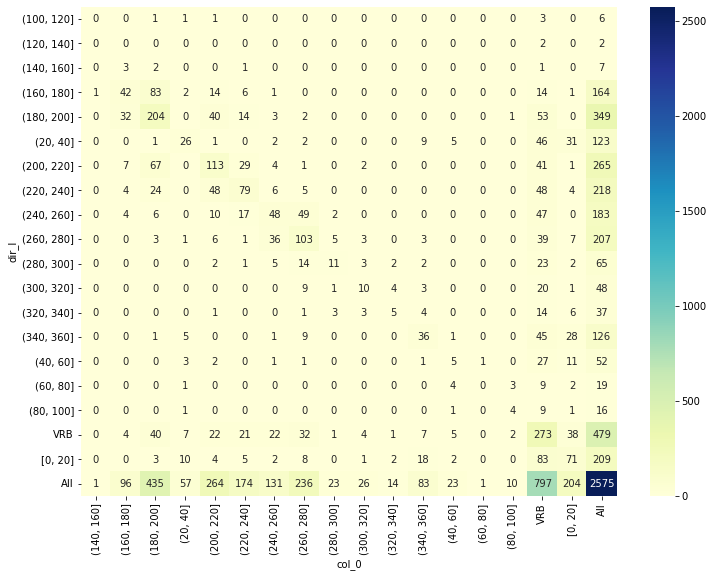

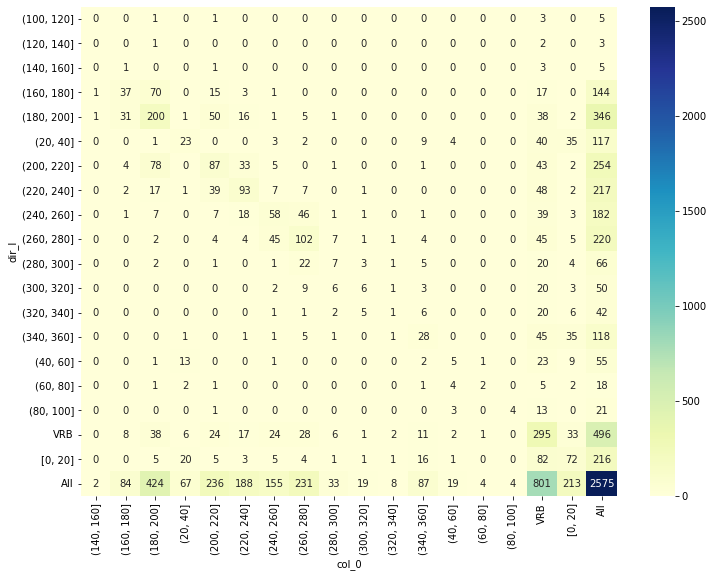

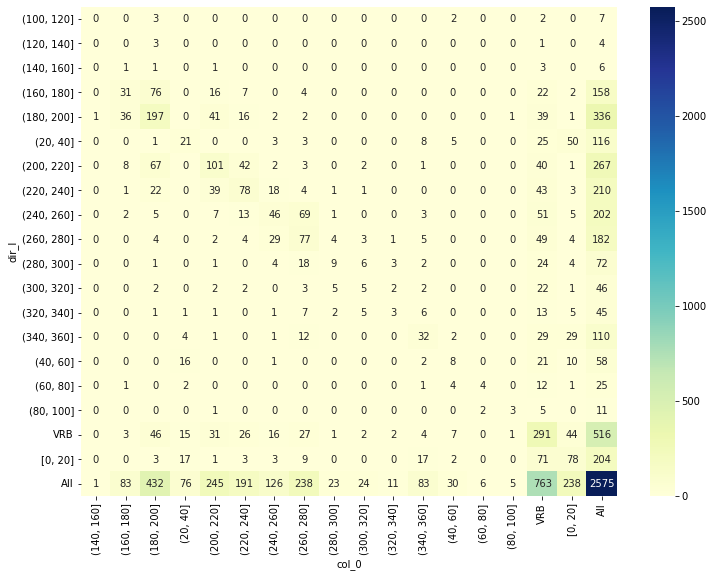

In [37]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\n accuracy mean of samples: ",acc_ml)



**T test (1sample) compare machine learning mean accuracy in a sample (n=10) versus meteorological model mean accuracy at point 0 (18.3%) and at point 1 (21.6%).
the alternative hypothesis is: the mean of the underlying distribution 
of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [38]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.183, alternative="greater")
sta1, p_value1 = stats.ttest_1samp(acc_ml, popmean=0.216, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")

print("\n**** Point 1 ****")
print("\np value point 1:",p_value1 )
if p_value1 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")    


alpha:  0.01

accuracy list from machine learning test: [0.39, 0.39, 0.39, 0.39, 0.39, 0.38, 0.4, 0.4, 0.4, 0.38]

**** Point 0 ****

p_value point 0: 7.129364186909932e-15

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0

**** Point 1 ****

p value point 1: 3.368596943572826e-14

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1


In [39]:
#random seed control
y_test.head(20)

time
2020-06-15 14:00:00    (240, 260]
2020-12-11 06:00:00    (220, 240]
2020-06-16 22:00:00           VRB
2019-12-06 06:00:00    (240, 260]
2020-01-25 17:00:00    (260, 280]
2020-11-27 16:00:00    (260, 280]
2020-11-20 23:00:00    (200, 220]
2019-05-29 22:00:00       [0, 20]
2020-10-28 11:00:00           VRB
2020-05-30 17:00:00    (240, 260]
2020-11-03 03:00:00    (340, 360]
2019-02-23 14:00:00    (100, 120]
2020-02-26 17:00:00    (220, 240]
2020-09-19 18:00:00           VRB
2019-06-10 13:00:00           VRB
2020-05-02 14:00:00    (220, 240]
2019-10-03 13:00:00    (180, 200]
2019-04-03 20:00:00    (340, 360]
2019-03-13 07:00:00           VRB
2020-05-25 19:00:00      (20, 40]
Name: dir_l, dtype: object

**Add time variables**

In [40]:
df_vrb["hour"] = df_vrb.index.hour
df_vrb["month"] = df_vrb.index.month
df_vrb["dayofyear"] = df_vrb.index.dayofyear
df_vrb["weekofyear"] = df_vrb.index.isocalendar().week.astype(int)

In [41]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')


 Quality report (Machine Learning)



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     1.000000
(140, 160]     0.000000  0.000000  0.000000    10.000000
(160, 180]     0.483146  0.292517  0.364407   147.000000
(180, 200]     0.458140  0.572674  0.509044   344.000000
(20, 40]       0.409091  0.207692  0.275510   130.000000
(200, 220]     0.447471  0.463710  0.455446   248.000000
(220, 240]     0.394595  0.374359  0.384211   195.000000
(240, 260]     0.296296  0.219780  0.252366   182.000000
(260, 280]     0.414634  0.485714  0.447368   210.000000
(280, 300]     0.450000  0.134328  0.206897    67.000000
(300, 320]     0.291667  0.175000  0.218750    40.000000
(320, 340]     0.470588  0.170213  0.250000    47.000000
(340, 360]     0.457143  0.264463  0.335079   121.000000
(40, 60]       0.285714  0.105263  0.153846    57.000000
(60, 80]       0.000000  0.000000  0.000000    26.000000
(80, 100]      0.428571  0.1875

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     9.000000
(120, 140]     0.000000  0.000000  0.000000     2.000000
(140, 160]     0.000000  0.000000  0.000000    15.000000
(160, 180]     0.470588  0.235294  0.313725   170.000000
(180, 200]     0.466063  0.614925  0.530245   335.000000
(20, 40]       0.471429  0.232394  0.311321   142.000000
(200, 220]     0.493023  0.395522  0.438923   268.000000
(220, 240]     0.410112  0.392473  0.401099   186.000000
(240, 260]     0.335404  0.282723  0.306818   191.000000
(260, 280]     0.467290  0.476190  0.471698   210.000000
(280, 300]     0.333333  0.216667  0.262626    60.000000
(300, 320]     0.476190  0.166667  0.246914    60.000000
(320, 340]     0.384615  0.111111  0.172414    45.000000
(340, 360]     0.347826  0.268908  0.303318   119.000000
(40, 60]       0.346154  0.147541  0.206897    61.000000
(60, 80]       0.250000  0.066667  0.105263    15.000000
(80, 100]      0.600000  0.2142

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     6.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.500000  0.100000  0.166667    10.000000
(160, 180]     0.533333  0.273973  0.361991   146.000000
(180, 200]     0.478936  0.640950  0.548223   337.000000
(20, 40]       0.420290  0.219697  0.288557   132.000000
(200, 220]     0.461847  0.406360  0.432331   283.000000
(220, 240]     0.405556  0.376289  0.390374   194.000000
(240, 260]     0.347826  0.237624  0.282353   202.000000
(260, 280]     0.463415  0.448113  0.455635   212.000000
(280, 300]     0.400000  0.153846  0.222222    65.000000
(300, 320]     0.320000  0.160000  0.213333    50.000000
(320, 340]     0.538462  0.127273  0.205882    55.000000
(340, 360]     0.472973  0.312500  0.376344   112.000000
(40, 60]       0.210526  0.086957  0.123077    46.000000
(60, 80]       0.333333  0.117647  0.173913    17.000000
(80, 100]      0.600000  0.2000

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     2.000000
(140, 160]     0.000000  0.000000  0.000000     6.000000
(160, 180]     0.394737  0.194805  0.260870   154.000000
(180, 200]     0.459695  0.618768  0.527500   341.000000
(20, 40]       0.368421  0.256881  0.302703   109.000000
(200, 220]     0.455357  0.392308  0.421488   260.000000
(220, 240]     0.422222  0.368932  0.393782   206.000000
(240, 260]     0.300699  0.265432  0.281967   162.000000
(260, 280]     0.441748  0.437500  0.439614   208.000000
(280, 300]     0.307692  0.151899  0.203390    79.000000
(300, 320]     0.371429  0.232143  0.285714    56.000000
(320, 340]     0.727273  0.148148  0.246154    54.000000
(340, 360]     0.372549  0.324786  0.347032   117.000000
(40, 60]       0.161290  0.116279  0.135135    43.000000
(60, 80]       0.000000  0.000000  0.000000    28.000000
(80, 100]      0.500000  0.1666

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000     5.000000
(160, 180]     0.445783  0.228395  0.302041   162.000000
(180, 200]     0.510870  0.601023  0.552291   391.000000
(20, 40]       0.376344  0.286885  0.325581   122.000000
(200, 220]     0.470588  0.451613  0.460905   248.000000
(220, 240]     0.408163  0.312500  0.353982   192.000000
(240, 260]     0.353448  0.224044  0.274247   183.000000
(260, 280]     0.409910  0.502762  0.451613   181.000000
(280, 300]     0.263158  0.169492  0.206186    59.000000
(300, 320]     0.315789  0.105263  0.157895    57.000000
(320, 340]     0.200000  0.042553  0.070175    47.000000
(340, 360]     0.479167  0.362205  0.412556   127.000000
(40, 60]       0.333333  0.075758  0.123457    66.000000
(60, 80]       0.000000  0.000000  0.000000    20.000000
(80, 100]      0.333333  0.0714

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     4.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000     2.000000
(160, 180]     0.371429  0.196970  0.257426   132.000000
(180, 200]     0.436782  0.579268  0.498034   328.000000
(20, 40]       0.370968  0.203540  0.262857   113.000000
(200, 220]     0.397436  0.343173  0.368317   271.000000
(220, 240]     0.447368  0.304933  0.362667   223.000000
(240, 260]     0.335878  0.243094  0.282051   181.000000
(260, 280]     0.451493  0.528384  0.486922   229.000000
(280, 300]     0.250000  0.097222  0.140000    72.000000
(300, 320]     0.166667  0.108696  0.131579    46.000000
(320, 340]     0.357143  0.116279  0.175439    43.000000
(340, 360]     0.364583  0.271318  0.311111   129.000000
(40, 60]       0.357143  0.096154  0.151515    52.000000
(60, 80]       0.142857  0.052632  0.076923    19.000000
(80, 100]      0.750000  0.1363

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     8.000000
(140, 160]     0.000000  0.000000  0.000000     5.000000
(160, 180]     0.419753  0.229730  0.296943   148.000000
(180, 200]     0.482609  0.616667  0.541463   360.000000
(20, 40]       0.400000  0.256410  0.312500   117.000000
(200, 220]     0.455253  0.436567  0.445714   268.000000
(220, 240]     0.437500  0.420765  0.428969   183.000000
(240, 260]     0.286822  0.202186  0.237179   183.000000
(260, 280]     0.411765  0.433333  0.422274   210.000000
(280, 300]     0.205882  0.104478  0.138614    67.000000
(300, 320]     0.464286  0.206349  0.285714    63.000000
(320, 340]     0.416667  0.111111  0.175439    45.000000
(340, 360]     0.388889  0.301724  0.339806   116.000000
(40, 60]       0.285714  0.120000  0.169014    50.000000
(60, 80]       0.000000  0.000000  0.000000    13.000000
(80, 100]      0.666667  0.090909  0.160000    22.000000
VRB            0.357977  0.5738

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score  support
(100, 120]     0.000000  0.000000  0.000000      6.0
(120, 140]     0.000000  0.000000  0.000000      2.0
(140, 160]     0.000000  0.000000  0.000000      7.0
(160, 180]     0.463158  0.268293  0.339768    164.0
(180, 200]     0.471111  0.607450  0.530663    349.0
(20, 40]       0.417910  0.227642  0.294737    123.0
(200, 220]     0.412214  0.407547  0.409867    265.0
(220, 240]     0.378698  0.293578  0.330749    218.0
(240, 260]     0.347518  0.267760  0.302469    183.0
(260, 280]     0.467890  0.492754  0.480000    207.0
(280, 300]     0.481481  0.200000  0.282609     65.0
(300, 320]     0.393939  0.270833  0.320988     48.0
(320, 340]     0.411765  0.189189  0.259259     37.0
(340, 360]     0.470588  0.317460  0.379147    126.0
(40, 60]       0.136364  0.057692  0.081081     52.0
(60, 80]       0.000000  0.000000  0.000000     19.0
(80, 100]      0.500000  0.250000  0.333333     16.0
VRB            0.359313  0.567850  0.440129   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     5.000000
(120, 140]     0.000000  0.000000  0.000000     3.000000
(140, 160]     0.000000  0.000000  0.000000     5.000000
(160, 180]     0.461538  0.250000  0.324324   144.000000
(180, 200]     0.489796  0.624277  0.548920   346.000000
(20, 40]       0.388889  0.239316  0.296296   117.000000
(200, 220]     0.441441  0.385827  0.411765   254.000000
(220, 240]     0.469945  0.396313  0.430000   217.000000
(240, 260]     0.392638  0.351648  0.371014   182.000000
(260, 280]     0.484848  0.509091  0.496674   220.000000
(280, 300]     0.270270  0.151515  0.194175    66.000000
(300, 320]     0.409091  0.180000  0.250000    50.000000
(320, 340]     0.100000  0.023810  0.038462    42.000000
(340, 360]     0.367816  0.271186  0.312195   118.000000
(40, 60]       0.238095  0.090909  0.131579    55.000000
(60, 80]       0.500000  0.166667  0.250000    18.000000
(80, 100]      0.666667  0.1904

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score      support
(100, 120]     0.000000  0.000000  0.000000     7.000000
(120, 140]     0.000000  0.000000  0.000000     4.000000
(140, 160]     0.000000  0.000000  0.000000     6.000000
(160, 180]     0.428571  0.227848  0.297521   158.000000
(180, 200]     0.476852  0.613095  0.536458   336.000000
(20, 40]       0.329268  0.232759  0.272727   116.000000
(200, 220]     0.463710  0.430712  0.446602   267.000000
(220, 240]     0.439153  0.395238  0.416040   210.000000
(240, 260]     0.372263  0.252475  0.300885   202.000000
(260, 280]     0.356557  0.478022  0.408451   182.000000
(280, 300]     0.375000  0.166667  0.230769    72.000000
(300, 320]     0.310345  0.195652  0.240000    46.000000
(320, 340]     0.363636  0.088889  0.142857    45.000000
(340, 360]     0.368421  0.318182  0.341463   110.000000
(40, 60]       0.233333  0.120690  0.159091    58.000000
(60, 80]       0.333333  0.120000  0.176471    25.000000
(80, 100]      0.750000  0.2727

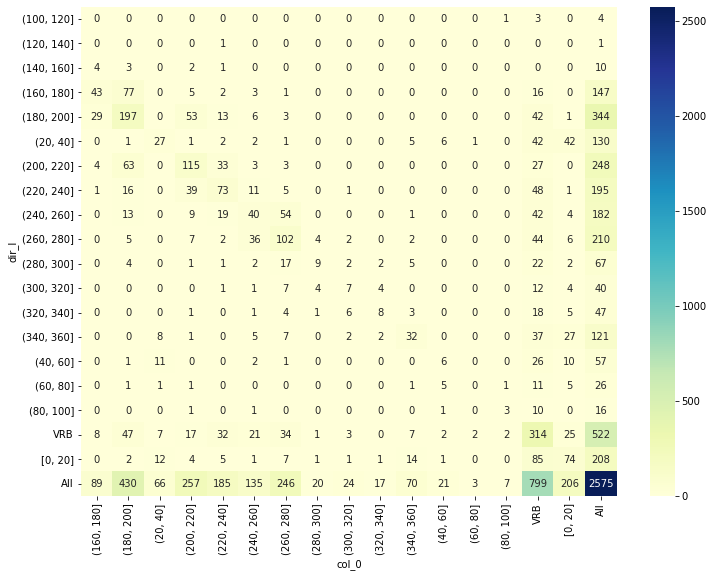

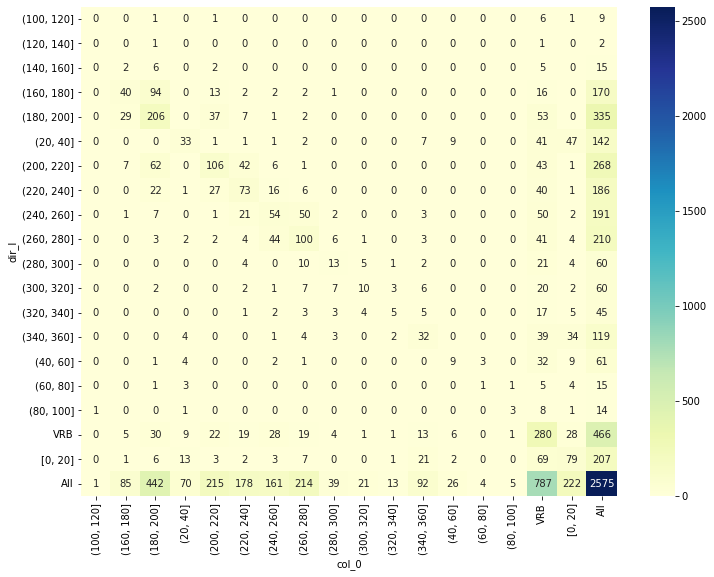

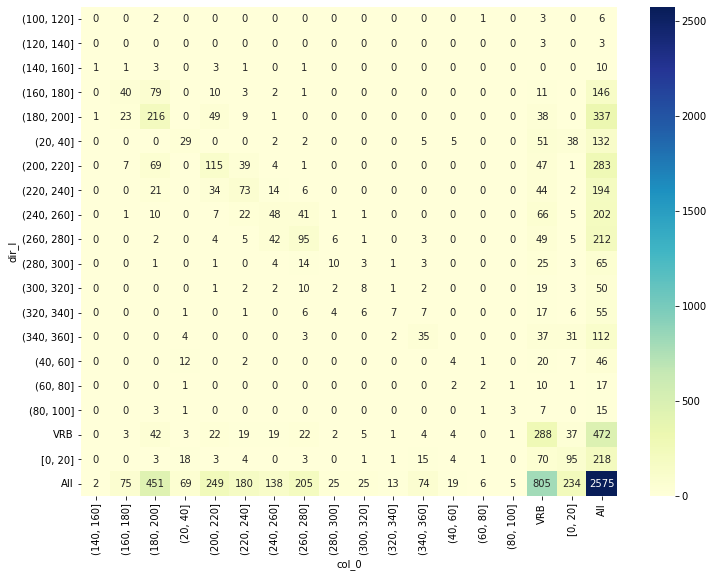

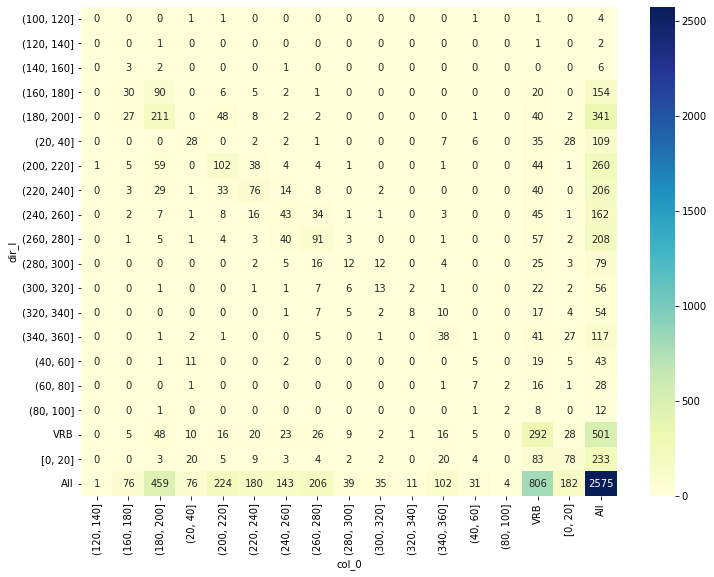

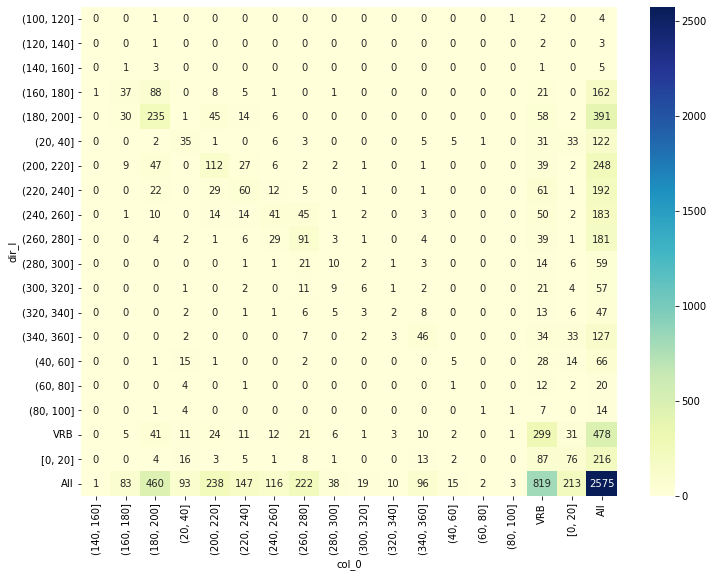

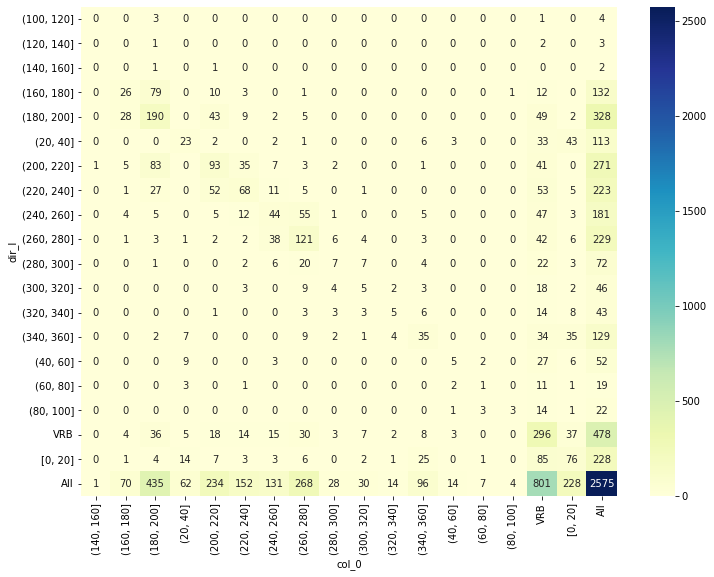

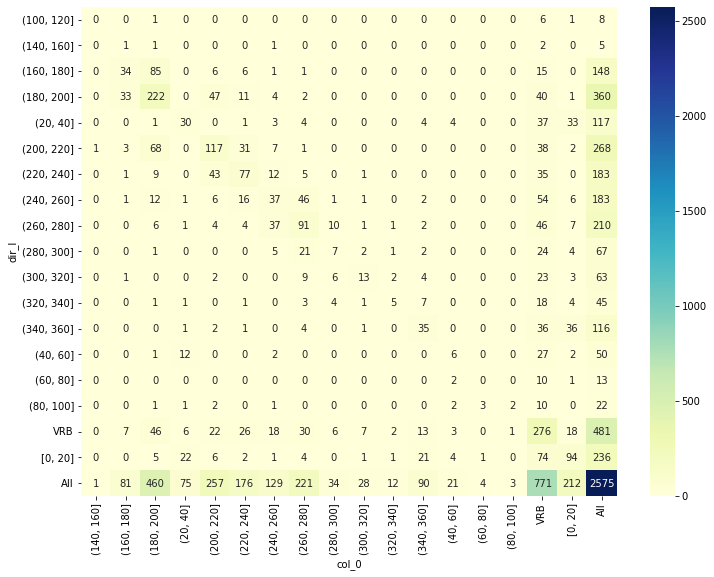

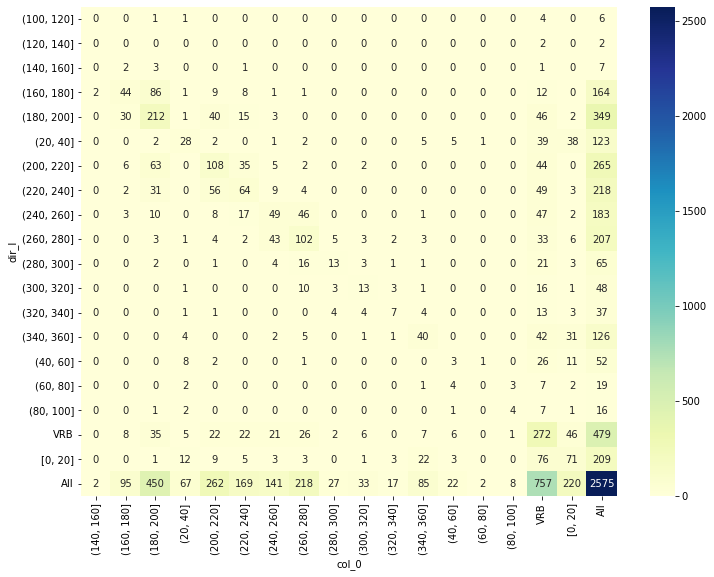

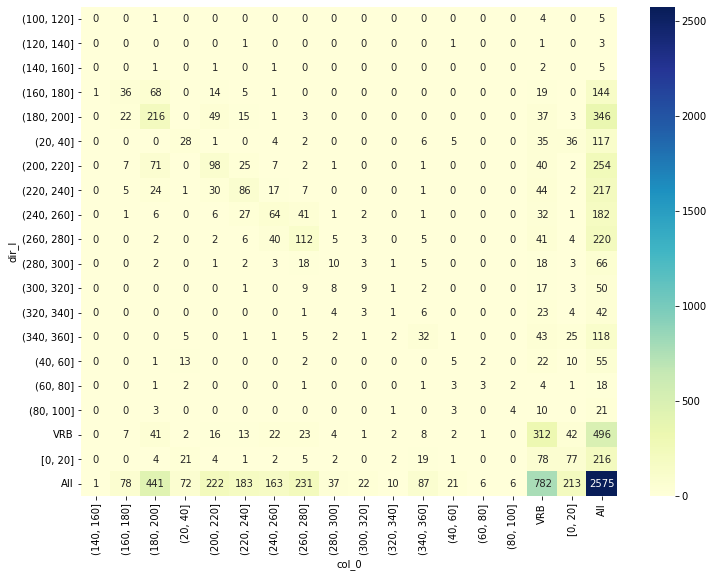

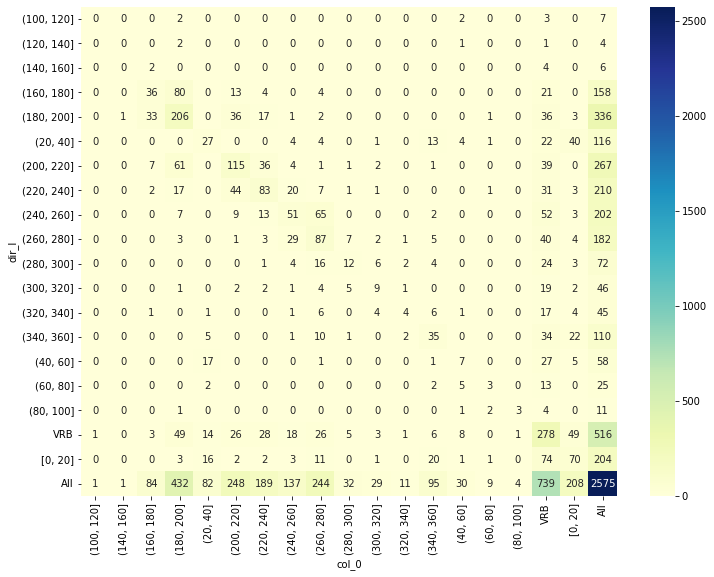

In [42]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

# mean accuracy machine learning sample after add time variables
acc_ml_a = []

# loop random
for t in range (0,10):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_a.append(round(accuracy_score(y_test, y_pred),2))

  #Confussion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\n Quality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nAccuracy mean of samples trained with time variables: ",acc_ml_a)

In [43]:
#random seed control
y_test.head(20)

time
2020-06-15 14:00:00    (240, 260]
2020-12-11 06:00:00    (220, 240]
2020-06-16 22:00:00           VRB
2019-12-06 06:00:00    (240, 260]
2020-01-25 17:00:00    (260, 280]
2020-11-27 16:00:00    (260, 280]
2020-11-20 23:00:00    (200, 220]
2019-05-29 22:00:00       [0, 20]
2020-10-28 11:00:00           VRB
2020-05-30 17:00:00    (240, 260]
2020-11-03 03:00:00    (340, 360]
2019-02-23 14:00:00    (100, 120]
2020-02-26 17:00:00    (220, 240]
2020-09-19 18:00:00           VRB
2019-06-10 13:00:00           VRB
2020-05-02 14:00:00    (220, 240]
2019-10-03 13:00:00    (180, 200]
2019-04-03 20:00:00    (340, 360]
2019-03-13 07:00:00           VRB
2020-05-25 19:00:00      (20, 40]
Name: dir_l, dtype: object

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [44]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_a, alternative="less")

print("\nmeans without time variables:", acc_ml)
print("\nmeans with time variables:", acc_ml_a)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the mean of the sample without time variables inputs is less than the mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables ")




means without time variables: [0.39, 0.39, 0.39, 0.39, 0.39, 0.38, 0.4, 0.4, 0.4, 0.38]

means with time variables: [0.41, 0.41, 0.42, 0.4, 0.41, 0.39, 0.41, 0.4, 0.42, 0.4]

alpha:  0.01

p_value point:  0.0001012496610338204

we are rejecting null hypothesis  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables

we are accepting alternative hypothesis: the mean of the sample without time variables inputs is less than the mean of the sample with time variables inputs


In [45]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [46]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
